In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv
from pprint import pprint
import csv
import random
import requests
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import re
from os import listdir
from nltk import FreqDist
from nltk.corpus import stopwords
import math
from multiprocessing import Pool
import numpy as np
import json
# Enable inline plotting
%matplotlib inline

In [4]:
# PATH_DATA = '/home/monk/automatedhr/res/Data/'
PATH_DATA = '/home/axat/BTP2/automatedhr/res/Data/'
def cleanCVskill(skills):
	skills = re.split('[()]',skills)
	skills = filter(None, skills)
	PerSkillset = []
	PerSkillLable = []
	for j in range(len(skills)):
		if (',' not in skills[j]):
			PerSkillLable.append(skills[j])
		else:
			tmp = skills[j].split(',')
			PerSkillset.extend(tmp)
	return PerSkillset,PerSkillLable

def experienceY(expStr):
	tmpStr = str(expStr)
	expr = map(int,re.findall('\d+',tmpStr))
	return map(int,re.findall('\d+',expStr))

StopWords = stopwords.words('english')
clean_title = lambda title: set(re.findall(r'\w+',title.lower()[1:])).difference(StopWords)
clean_jd = lambda jd: set(re.findall(r'\w+',jd.lower())).difference(StopWords)
clean_loc = lambda loc: loc.lower()
get_skillset = lambda skills_list: sorted(set(skill for skills in skills_list for skill in skills))

def getSkillList(skills):
    return [skill.lower() for skill in re.split(r'^\s*|,\s*',skills) if skill not in ['']]

# def getSkillList(skills):
#     return [skill.lower() for skill in re.split(r'^\s|,\s',skills) if skill not in ['']]
#     return [skill.lower() for skill in re.split(r'^\s|,\s',skills)[1:]]
    
#----------------- Remove NaN Replace spaces by dash and . by dot -------------------
def skillModify(skillList):
    if('nan' in skillList):
        skillList.remove('nan')
    for j in xrange(len(skillList)):
        skillList[j] = " ".join(skillList[j].split())
#     	print 'before ',skillList
    for j in xrange(len(skillList)):
        skillList[j] = skillList[j].replace("/"," or ")
        skillList[j] = skillList[j].replace(" ","-")
        skillList[j] = skillList[j].replace("#","-sharp")
        skillList[j] = skillList[j].replace("+","plus")
        skillList[j] = skillList[j].replace("&","and")
        skillList[j] = re.sub(r'([\.\-#])\1{2,}', r'\1', skillList[j])
        

        if('.' in skillList[j]):
            if('.' == skillList[j][0]):
                if(' ' == skillList[j][1]):
                    skillList[j] = skillList[j].replace(".","dot")
                else:
                    skillList[j] = skillList[j].replace(".","dot-")
            elif('.' == skillList[j][len(skillList[j])-1]):
                skillList[j] = skillList[j].replace(".","-dot")
    return skillList

In [46]:
Location = r'/home/axat/BTP2/automatedhr/res/Data/JobPostCSVs/application-developer.csv'
df = pd.read_csv(Location)
print df.shape
# df.dropna(axis=0,how='any',inplace=True)
# print df.shape
df.columns
f = 'skills'

(1000, 12)


## get set of skills from all posts

In [118]:
a = set(re.sub(r'^\s','',skill.lower()) for skills in df.skills.str.split(r',\s').tolist() for skill in skills)

# data pre-processing JobPosts

In [5]:
x = []
columns = ['title','company_name','req_exp','location','skills','job_description']
c = 0
for path in sorted(listdir(PATH_DATA+'JobPostCSVs/')):
    df = pd.read_csv(PATH_DATA+'JobPostCSVs/'+path,usecols=columns)
    x.append(df)
    

JPDF = pd.concat(x, ignore_index=True)
# print DF.shape
JPDF.dropna(axis=0,how='any',inplace=True)
# JPDF2 = JPDF.copy()
# DF
# DF.to_csv('jobPosts.csv')
# DF.to_json('jobPostsJSON.txt')
JPDF.skills[0]

' Oracle, J2Ee, Sybase, Javascript, SDLC, Coding, HTML, Application development, Agile'

In [47]:
tempjpdf=JPDF.loc[[1,3,7,8]]
df = pd.DataFrame()
df=df.append(JPDF.iloc[8,:])
df

company_name                                    job_description  \
8  JPMorgan Chase     Wh We Are: The Enterprise system Team is res...   

    location    req_exp                                             skills  \
8  Hyderabad  2 - 4 yrs   Db2, Project management, Cobol, Cics, Product...   

                                title  
8   Application Developer - Mainframe

In [16]:
JPDF.iloc[]

title                                   Dotnet Application Developer
company_name                                         JPMorgan Chase 
req_exp                                                   5 - 10 yrs
location                                                   Bengaluru
skills              SQL, Technical support, SSIS, Application dev...
job_description      JPMorgan Chase & Co. (NYSE: JPM) is a leadin...
Name: 76, dtype: object

## Clean

In [6]:
JPDF.skills = map(skillModify,map(getSkillList,JPDF.skills))
JPDF.req_exp = map(experienceY,JPDF.req_exp)
JPDF.title = map(clean_title,JPDF.title)
JPDF.location = map(clean_loc,JPDF.location)
JPDF.job_description = map(clean_jd,JPDF.job_description)

In [19]:
', '.join(JPDF.iloc[128,:].skills)

'java, sql, oracle, linux, hibernate, core-java, webservices, uml, tomcat'

In [15]:
pd.read_json(JPDF.iloc[:1,:].to_json())

company_name                                    job_description  \
0  JPMorgan Chase   [versed, global, coding, emerging, accommodate...   

  location req_exp                                             skills  \
0   mumbai  [3, 7]  [oracle, j2ee, sybase, javascript, sdlc, codin...   

                                  title  
0  [applications, developer, lead, mgr]

In [12]:
# JPDF2.iloc[:2,:]
jpjson = JPDF.iloc[[1,3,5],:].to_pickle('tempjpdf')
jpreadcsv = pd.read_pickle('tempjpdf')
jpreadcsv

title     company_name  req_exp   location  \
1   {application, developer}  JPMorgan Chase    [6, 8]  bengaluru   
3  {applications, developer}  JPMorgan Chase    [6, 8]  hyderabad   
5   {application, developer}  JPMorgan Chase   [8, 10]  hyderabad   

                                              skills  \
1  [sql-server-dba, middleware, ms-sql, messaging...   
3  [sql, unix, web-services, perl, db2, apache, a...   
5  [sql, unix, web-services, perl, db2, apache, a...   

                                     job_description  
1  {operations, supported, dynamic, years, portfo...  
3  {operations, code, institutional, global, jpmo...  
5  {operations, code, institutional, global, jpmo...

## skills freq analysis

In [7]:
fd = FreqDist(skill for skills in JPDF.skills for skill in skills)

print fd.most_common(50)
# fd.plot(25)
# fd.plot(25,cumulative=True)
# fd.N()
# len(fd)
# fd.freq('javascript')

[('javascript', 9012), ('java', 8612), ('jquery', 5121), ('html', 5110), ('sql', 4798), ('networking', 4225), ('linux', 4049), ('software-development', 3981), ('web-technologies', 3839), ('css', 3697), ('j2ee', 3300), ('project-management', 3293), ('mysql', 3245), ('python', 3078), ('c-sharp', 3075), ('oracle', 3015), ('hibernate', 2951), ('dot-net', 2898), ('core-java', 2792), ('technical-support', 2730), ('ajax', 2696), ('php', 2688), ('web-services', 2669), ('software-engineering', 2608), ('cplusplus', 2591), ('html5', 2489), ('sql-server', 2396), ('unix', 2395), ('c', 2110), ('windows', 2037), ('mvc', 2012), ('troubleshooting', 2000), ('spring', 2000), ('web-development', 1866), ('application-development', 1829), ('coding', 1801), ('operations', 1780), ('design-patterns', 1707), ('asp.net', 1698), ('sales', 1676), ('computer-science', 1622), ('agile', 1619), ('business-development', 1498), ('automation', 1417), ('wcf', 1408), ('android', 1369), ('algorithms', 1331), ('perl', 1306),

### temp analysis

In [51]:
a = [['a','b','c','d'],['a','m','n','c','d'],['b','e','f','n','m'],['a','e','b']]
fd = FreqDist(skill for skills in a for skill in skills)
# fd.plot(3)
print len(fd)
print fd.most_common(50)
# fd.N()

8
[('a', 3), ('b', 3), ('c', 2), ('e', 2), ('d', 2), ('m', 2), ('n', 2), ('f', 1)]


# data pre-processing Resumes 

In [132]:
# fn = sorted([ f for f in listdir('/home/axat/BTP2/Profiles/1/') if f.endswith('.txt')])

with open(PATH_DATA+'Profiles/1/Desktop Support Manager.txt') as resumes:
    data = json.load(resumes)
    
feature = data[1]['Work-Experience']['Job-Description'].split('&&')[0]
set_keywords = [str(w.lower()) for w in re.findall(r'[a-zA-Z]+',feature)]
set_keywords = set(set_keywords)
set_keywords = set_keywords.difference(StopWords)
print set_keywords
# FreqDist(set_keywords)

set(['diagnose', 'outlook', 'clearpath', 'laptop', 'crisil', 'manager', 'anti', 'troubleshooting', 'remotely', 'pvt', 'knowledge', 'working', 'pc', 'support', 'desktop', 'maintenance', 'printers', 'tickets', 'around', 'company', 'basic', 'laptops', 'day', 'timely', 'resolve', 'troubleshoot', 'devices', 'technical', 'rising', 'providing', 'mails', 'workstations', 'ad', 'sep', 'phones', 'computer', 'manner', 'seo', 'technology', 'end', 'ticketing', 'field', 'tool', 'printer', 'users', 'deploy', 'marketing', 'problems', 'virus', 'user', 'based', 'configuration', 'requests', 'clint', 'installation', 'service', 'mobile', 'resolving', 'maintain', 'ltd', 'microsoft'])


In [58]:
feature

u'deploy, maintain, troubleshoot and support computer workstations, laptops, printers, mobile devices, phones and other computer. \n\u27a2 PC Maintenance & Troubleshooting Diagnose and resolve computer problems and requests from users in a timely manner. \n\u27a2 Remotely support end users in the field. \n\u27a2 Providing Technical Support for around 200+ User on day- to- day Desktop/Laptop/Printer/Mails problems. \n\u27a2 Microsoft Outlook (2010, 13 and 16) installation & configuration and basic troubleshooting. \n\u27a2 Basic Knowledge of AD, and Working with SEP (Anti-virus) Clint. \n\u27a2 Working on Ticketing Tool (Crisil Service Manager) for rising and resolving tickets. \n \nWorking with Clearpath Technology Pvt. Ltd. (SEO & Marketing Based Company) '

## ranking procedure

In [15]:
', '.join(JPDF.ix[512,:].skills)

'java, javascript, android, web-technologies, coding, product-design, software-development, unit-testing'

In [17]:
url = 'http://localhost:5001/clean_client_data'
#skills='abc, xyz, pqr'
# skills = 'core-java, j2ee, jdbc, multithreading, oracle, perl, sql, sybase'
skills = 'java, android, eclipse, hibernate, j2ee'
# skills = 'java, sql, oracle, linux, hibernate, core-java, webservices, uml, tomcat'
data = {'skills':skills, 'title':'application developer', 'exp': 4, 'location':'pune'}
headers = {'Content-Type' : 'application/json'}
r = requests.post(url, data=json.dumps({k:data[k] for k in ['skills','title']}), headers=headers)
clean_data = json.loads(r.text)
data['skills'] = clean_data['skills']
data['title'] = clean_data['title']
data['type'] = 'candidate'
print data

url = 'http://localhost:5006/rank/0'
headers = {'Content-Type' : 'application/json'}
r = requests.post(url, data=json.dumps(data), headers=headers)
ndfjson = json.loads(str(r.text))

# print ndfjson['IDs']
# print ndfjson['Rank']
# tdf = pd.read_json(str(r.text))
# tdf



{'skills': [u'java', u'android', u'eclipse', u'hibernate', u'j2ee'], 'type': 'candidate', 'location': 'pune', 'exp': 4, 'title': [u'application', u'developer']}


## calling clustering service

In [40]:

random.seed(0)
samples_index = random.sample(xrange(JPDF.shape[0]),2000)

r1 = requests.get('http://localhost:5002/live')
r2 = requests.get('http://localhost:5003/live')
print r1.text
print r2.text
ind = JPDF.iloc[samples_index,:].skills.index
skills = JPDF.iloc[samples_index,:].skills.tolist()
data = {k:v for k,v in zip(ind,skills)}

url = 'http://localhost:5002/clustering'
headers = {'Content-Type' : 'application/json'}
r = requests.post(url, data=json.dumps(data), headers=headers)
print r.text

I'm alive!, Cluster Service
I'm alive!, Ontology Service
clustering finished!


## sending test data for knn 

In [71]:
data = {'skills':['asp-.net', 'c-sharp', 'dot-net', 'mvc', 'sql', 'wcf']}

url = 'http://localhost:5002/knn'
headers = {'Content-Type' : 'application/json'}
r = requests.post(url, data=json.dumps(data), headers=headers)
json.loads(r.text)

u'{"43800":0.0,"15228":2.8284271247,"47155":3.0,"64312":3.0,"46771":3.6055512755}'

In [72]:
JPDF.ix[43800,:].skills

['dot-net', 'asp-.net', 'wcf', 'mvc', 'c-sharp', 'sql']

## sending data for ranking

In [39]:
Id = [1,3,10,20]
jpjson = JPDF.ix[Id,['company_name','location','req_exp','skills']]
# jpjson
url = 'http://localhost:5006/rank'
data={'neighbour_type':'job','neighbours':jpjson.to_json()}
headers = {'Content-Type' : 'application/json'}
r = requests.post(url, data=json.dumps(data), headers=headers)
print r.text

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>company_name</th>
      <th>location</th>
      <th>req_exp</th>
      <th>skills</th>
      <th>Rank</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>3</th>
      <td>JPMorgan Chase</td>
      <td>hyderabad</td>
      <td>[6, 8]</td>
      <td>[sql, unix, web-services, perl, db2, apache, a...</td>
      <td>1.339807</td>
    </tr>
    <tr>
      <th>10</th>
      <td>JPMorgan Chase</td>
      <td>mumbai</td>
      <td>[1, 5]</td>
      <td>[c, loans, analytical, middleware, fixed-incom...</td>
      <td>0.789807</td>
    </tr>
    <tr>
      <th>20</th>
      <td>JPMorgan Chase</td>
      <td>bengaluru</td>
      <td>[5, 8]</td>
      <td>[oracle, core-java, db2, troubleshooting, data...</td>
      <td>0.363912</td>
    </tr>
    <tr>
      <th>1</th>
      <td>JPMorgan Chase</td>
      <td>bengaluru</td>
      <td>[6, 8]</td>
      <td>[sql-server-dba, middleware, ms-sql

### For testing purpose

#### knn

In [22]:
c = set(['Asdad','Bfdsfsdf','Csdfsfds','Dsdfsdfg','Esdgdfg','Fsdf','Gfdf','Hdfd','Isdf','Jsd'])
df = pd.DataFrame(columns=c)
c = df.axes[1]
df.loc[1] = [1,0,1,0,1,0,1,1,2,1]
df.loc[3] = [0,1,1,1,1,1,0,1,2,2]
df.loc[5] = [1,1,0,1,0,0,1,0,0,0]
df.loc[7] = [1,1,1,0,0,0,1,1,0,1]
df.loc[8] = [1,0,0,1,0,1,1,0,1,0]
df['lable'] = pd.Series([0,1,1,2,2], index=df.index)

df.isnull().sum(axis=1)
# sums[sums>0].index

c = df.count(axis=1)
c[c<df.shape[1]].index
cols = df.iloc[:,:].columns
# for i in range(3):
#     df2 = df[df.lable==i]
#     df2 = df2.iloc[:,:-1]
#     bt = df2.apply(lambda x: x > 0)
#     # pd.set_option('display.max_rows', 10000)
#     ct = bt.apply(lambda x: str(i)+': '+', '.join(list(cols[x.values])), axis=1)
#     with open('temp_file.csv', 'a') as f:
#         ct.to_csv(f, header=False)

# for i in range(3):
#     d = df[df.lable==i]
#     for i,r in d.ix[:,:-1].iterrows():
#         print ': ',[x for x in r if x >0]
for i,v in df.apply(lambda x: x > 0).apply(lambda x: list(cols[x.values]), axis=1).iteritems():
    print v

['Jsd', 'Bfdsfsdf', 'Esdgdfg', 'Gfdf', 'Asdad', 'Fsdf', 'Csdfsfds']
['Dsdfsdfg', 'Bfdsfsdf', 'Hdfd', 'Esdgdfg', 'Isdf', 'Asdad', 'Fsdf', 'Csdfsfds', 'lable']
['Jsd', 'Dsdfsdfg', 'Hdfd', 'Gfdf', 'lable']
['Jsd', 'Dsdfsdfg', 'Bfdsfsdf', 'Gfdf', 'Asdad', 'Csdfsfds', 'lable']
['Jsd', 'Hdfd', 'Isdf', 'Gfdf', 'Fsdf', 'lable']


#### knn contd.

In [41]:
v = [1,1,0,1,0,0,1,0,0,0]
mat = df.ix[:,:-1].values
dis = []
for i in df.index:
    dis.append(sum((df.ix[i,:-1].values-v)**2)**(0.5))
dis = pd.Series(dis, index=df.index)
print dis
print v
print mat
dis.sort_values()[:3].index


1    3.162278
3    3.741657
5    0.000000
7    2.000000
8    1.732051
dtype: float64
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[[ 1.  0.  1.  0.  1.  0.  1.  1.  2.  1.]
 [ 0.  1.  1.  1.  1.  1.  0.  1.  2.  2.]
 [ 1.  1.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  0.  1.]
 [ 1.  0.  0.  1.  0.  1.  1.  0.  1.  0.]]


Int64Index([5, 8, 7], dtype='int64')

In [23]:
# Str = 'obbjjjeective---c.....#####+++++'
# re.sub(r'([\.\-#])\1{2,}', r'\1', Str)
sw = stopwords.words('english')
Str = 'Associate IB F and & BM (CFO MIS C# java)'

set(re.findall(r'\w+',Str.lower())).difference(sw)

{'associate', 'bm', 'c', 'cfo', 'f', 'ib', 'java', 'mis'}

In [45]:
# a = '           software engineer,    sql server database, java, troubleshooting, python, big data, web services'
# re.split(r'^\s*|,\s*',a)[1:]
feature = ['a','b','c','d','e','f','g','h']
inputs = ['a','f','b','g']
weights = {'a':1,'f':2,'b':1,'g':3}
# [0 if skill not in inputs else weights[skill] for skill in feature]

[1, 1, 0, 0, 0, 2, 3, 0]

# Kmeans and visualization

Clustering Excecution Time: 0.130853891373 Inertia:  3580470.28193
[2 1 1 ..., 0 0 1]


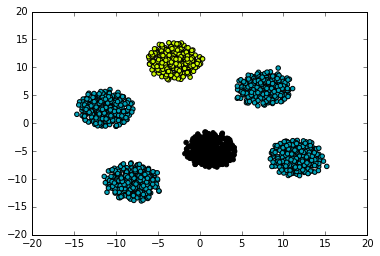

In [30]:
import time
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import numpy.linalg as LA
def gscatter(x,labels):
    n = len(set(labels))
    label_color = [cm.spectral(float(l)/n) for l in labels]
    plt.scatter(x[:,0],x[:,1], c=label_color)
    
    
X, y = make_blobs(n_samples=2000, centers=6, n_features=100,random_state=0)
t1 = time.time()
# kmeans = KMeans(n_clusters=6,init='k-means++', random_state=0)
# y = kmeans.fit_predict(X)
kmeans = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=1000,n_init=10, max_no_improvement=10, verbose=0)

y = kmeans.fit_predict(X)

print 'Clustering Excecution Time:',(time.time()-t1), 'Inertia: ',kmeans.inertia_
print y
model = TSNE(n_components=2)
x_2d = model.fit_transform(X)
gscatter(x_2d,y)



# temp cell

In [75]:
# id = [9,5,2,50]
# tjpdf = JPDF.loc[id]

# x = {k:v.location for k,v in tjpdf.iterrows()}

dis = {1:1229, 2:221, 50:91, 30:100}
s = lambda x :max(x)-min(x)
# ran = map(s,dis.values())
s(dis.values())

1138

In [67]:
import pickle
a =set(['a','c','b','d','1','aa','e','gg','f'])
a = sorted(a)
# b=a
pickle.dump(a,open('temp_feature_save','wb'))
b = pickle.load(open('temp_feature_save','rb'))
print a
print b

['1', 'a', 'aa', 'b', 'c', 'd', 'e', 'f', 'gg']
['1', 'a', 'aa', 'b', 'c', 'd', 'e', 'f', 'gg']


In [13]:
strn = 'core-java,hibernate,java,linux,oracle,sql, tomcat, uml, webservices'
getSkillList(strn)

['core-java',
 'hibernate',
 'java',
 'linux',
 'oracle',
 'sql',
 'tomcat',
 'uml',
 'webservices']

In [50]:
cluster_df = pd.read_pickle('/home/axat/BTP2/automatedhr/src/clusterService/JP_clusterDF')
cluster_df.index
jpdf_cluster = JPDF.ix[cluster_df.index,:]
jpdf_cluster.to_csv('/home/axat/Desktop/JP_TrainingData.csv',index=False,columns=('title','company_name','req_exp','location','skills'))
jpdf_cluster.columns

Index([u'title', u'company_name', u'req_exp', u'location', u'skills',
       u'job_description'],
      dtype='object')